# Bli en Data Scientist på 20 minutter
** JavaZone 2017 **  
** simen.eide@finn.no **  
** twitter.com/simeneide ** 

<img class="center-block" src="images/berlingo.png"/>

<img class="center-block" src="images/caddy.png"/>

# Tutorial: Finn salgspris på bil


### 0. Finn et use-case
### 1. Få tak i data
### 2. Tren modell på treningsdata
### 3. Test modell på noe annet

## 1. Få tak i data


In [28]:
# Alle pakkene kan installeres ved å skrive pip install *pakkenavn* i kommandolinja.

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from ggplot import *

# må kommenteres ut hvis det kjøres som python-script:
%matplotlib inline 

caddy = pd.read_pickle('caddy_jz.pickle')
caddy.sample(10)

,ObjectPrice,YearModel,Milage,FirstRegistrationYear,Effect,Weight,EngineVolume,RegistrationClass_Annet,RegistrationClass_Personbil,RegistrationClass_Varebil,BodyType_Annet,BodyType_Flerbruksbil,BodyType_Kasse,BodyType_Kombi 3-dørs,BodyType_Kombi 5-dørs,BodyType_Pickup,BodyType_Stasjonsvogn,WheelDrive_Bakhjulsdrift,WheelDrive_Firehjulsdrift,WheelDrive_Forhjulsdrift
334,93800.0,2008.0,63.000,2008.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1508,97770.0,2010.0,91.000,2009.0,105.0,1504.0,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1396,267952.0,2014.0,26.546,2014.0,170.0,NaN,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1198,123675.0,2012.0,91.500,2011.0,102.0,NaN,1.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
492,48700.0,2009.0,135.850,1900.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1591,237952.0,2016.0,3.000,2015.0,122.0,NaN,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1961,135000.0,2011.0,98.000,NaN,NaN,1630.0,1598.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1192,98700.0,2013.0,171.000,1900.0,102.0,NaN,1.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1099,105000.0,2010.0,115.000,1900.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1159,103700.0,2010.0,48.150,2009.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


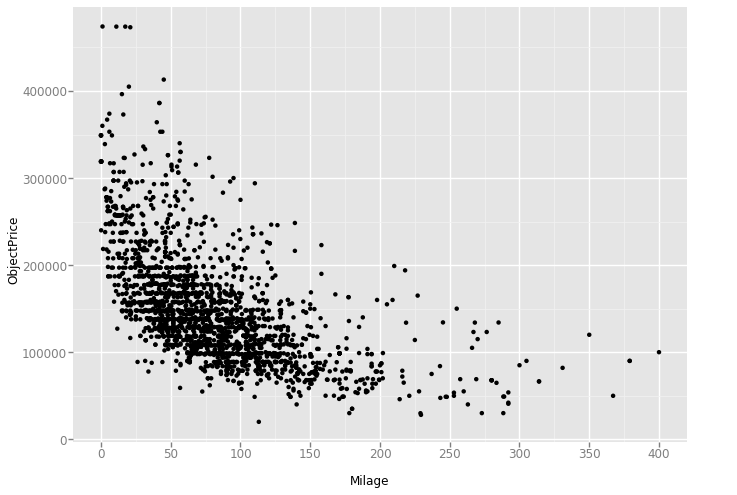

<ggplot: (272565512)>

In [29]:
ggplot(aes(x='Milage',y='ObjectPrice'), data = caddy) + geom_point()

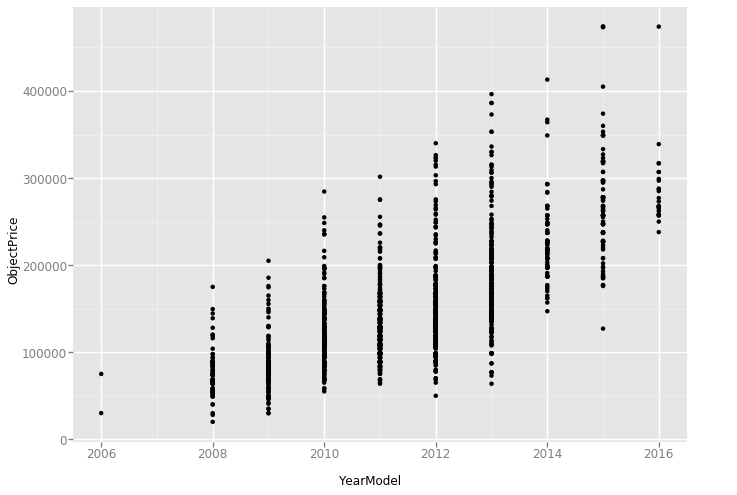

<ggplot: (-9223372036582232085)>

In [30]:
ggplot(aes(x='YearModel',y='ObjectPrice'), data = caddy) + geom_point()

## Trene / Test
Del data inn i ett sett dedikert for trening, og ett sett dedidkert for å teste hvor bra modellen var

In [31]:
np.random.seed(5)
random_numbers = np.random.random(caddy.shape[0])
print(random_numbers[0:10])

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


In [32]:
train_index = random_numbers < 0.7

train = caddy[ train_index == True]
test = caddy[ train_index == False]

print('Training set: \t Rows: %d Columns: %d' % train.shape)
print('Test set: \t Rows: %d Columns: %d' %test.shape)

Training set: 	 Rows: 1457 Columns: 20
Test set: 	 Rows: 645 Columns: 20


In [33]:
train.head(5)

,ObjectPrice,YearModel,Milage,FirstRegistrationYear,Effect,Weight,EngineVolume,RegistrationClass_Annet,RegistrationClass_Personbil,RegistrationClass_Varebil,BodyType_Annet,BodyType_Flerbruksbil,BodyType_Kasse,BodyType_Kombi 3-dørs,BodyType_Kombi 5-dørs,BodyType_Pickup,BodyType_Stasjonsvogn,WheelDrive_Bakhjulsdrift,WheelDrive_Firehjulsdrift,WheelDrive_Forhjulsdrift
1,86500.0,2009.0,112.118,2008.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,128700.0,2011.0,54.900,2010.0,102.0,NaN,1.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,98800.0,2010.0,65.000,1900.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,137000.0,2012.0,120.000,1900.0,110.0,NaN,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,87800.0,2009.0,84.000,1900.0,105.0,NaN,1.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Tren en modell

In [34]:
model = RandomForestRegressor(n_estimators=1000, n_jobs = 5, min_samples_split=10,
                              min_samples_leaf = 5)

def prepare_data(dat):
    X = dat.drop(['ObjectPrice'], axis = 1).fillna(0)
    y = dat[['ObjectPrice']]['ObjectPrice']
    return X, y

X, y = prepare_data(train)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=5, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Sjekk hvor bra modellen funker

In [35]:
X, y = prepare_data(test)
yhat = model.predict(X)

In [36]:
result = pd.DataFrame({'truth' : y, 
                    'prediction' : yhat})
result['percentage_diff'] = ((result['prediction'] - result['truth']) / result['truth']*100).round()

print(result.sample(5))

         prediction     truth  percentage_diff
400   119676.417402  136000.0            -12.0
265   141808.243804  147100.0             -4.0
1634  144291.318265  110000.0             31.0
1102  102858.645059   97800.0              5.0
119    88103.504261   93800.0             -6.0


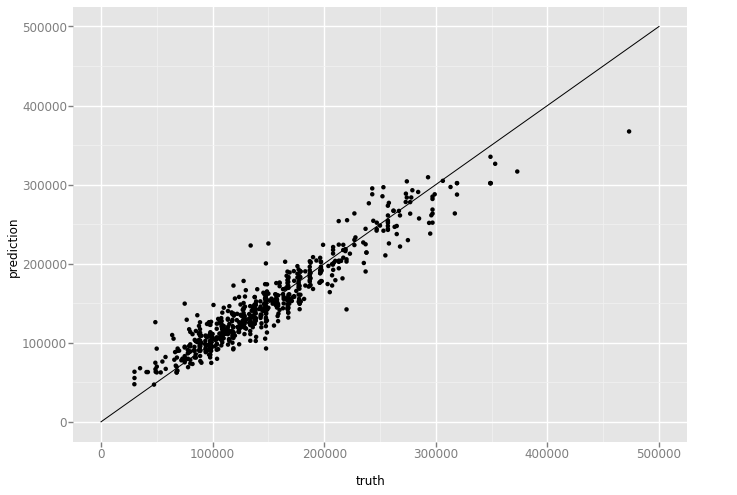

<ggplot: (273579563)>

In [37]:
ggplot(aes("truth","prediction"),data=result) + geom_point() + geom_abline()

In [38]:
print('Mean Absolute Error: %.1f' % abs(result['percentage_diff']).mean())

Mean Absolute Error: 11.1


### Min bil

In [39]:
prospect_car = caddy[caddy.index == 2036].copy()
X, y = prepare_data(prospect_car)

print('Model Prediction of my car: %d kr' % model.predict(X))

Model Prediction of my car: 237472 kr


Oppdaget at bilen jeg så på hadde feil-tolket fritekstfeltet "Effect". Fyll inn 140hk som er maks på disse bilene:

In [40]:
prospect_car.Effect = 140
X, y = prepare_data(prospect_car)

print('Model Prediction of my car: %d kr' % model.predict(X))

Model Prediction of my car: 264140 kr


  
# Data Scientist Procedure:
### 0. Finn et use-case
### 1. Få tak i data
### 2. Tren modell på treningsdata
### 3. Test modell på noe annet    

<img class="center-block" src="images/caddy_bed.jpg"/>

### simen.eide@finn.no

### twitter.com/simeneide 